
CLIP Score Evaluation Results:
--------------------------------------------------

Image: NRLM_Application_Process_and_Benefits.png
Prompt: Create a poster with minimal text with the image from this image prompt : Create a vibrant and hopeful scene depicting a rural village setting in India, illustrating the impact of the Aajeevika - National Rural Livelihoods Mission (NRLM). In the foreground, show Kavita Sharma, a 34-year-old female farmer and Self-Help Group (SHG) facilitator. She stands confidently, surrounded by lush green fields, representing sustainable agriculture promoted by the scheme. Kavita is interacting with a diverse group of women from the community, symbolizing empowerment and collective decision-making.

In the background, depict a small group of women engaged in different activities: one is skillfully crafting handmade goods, another is tending to livestock, and a third is using a tablet or smartphone, indicating digital financial inclusion. Nearby, a community meet

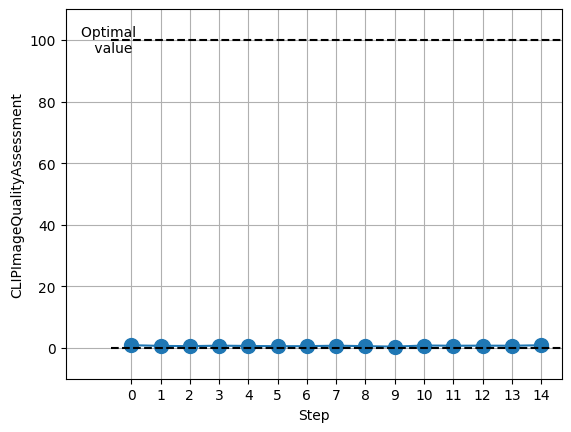

In [1]:
import torch
from torchmetrics.multimodal import CLIPImageQualityAssessment
from PIL import Image
import os
from torchvision import transforms

def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return preprocess(image)

def evaluate_images():
    image_dir = "images_prism"
    prompt_dir = "image_prompts_prism"

    values = []
    file_pairs = []

    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            prompt_file = os.path.join(prompt_dir, filename.replace('.png', '.txt'))
            if os.path.exists(prompt_file):
                image_path = os.path.join(image_dir, filename)
                image_tensor = load_and_preprocess_image(image_path).unsqueeze(0)

                with open(prompt_file, 'r') as f:
                    prompt = f.read().strip()

                metric = CLIPImageQualityAssessment(prompts=(("Relevant poster with a welfare scheme", "Image completely irrelevant not pertaining to a welfare scheme"),"quality"))
                
                with torch.no_grad():
                    score = metric(image_tensor)
                clip_score_value = score['user_defined_0']

                file_pairs.append((filename, prompt))
                values.append(clip_score_value)
            else:
                print(f"Prompt file not found for image: {filename}")

    if not values:
        print("No CLIP scores calculated.")
        return

    print("\nCLIP Score Evaluation Results:")
    print("-" * 50)

    for (filename, prompt), clip_score_value in zip(file_pairs, values):
        print(f"\nImage: {filename}")
        print(f"Prompt: {prompt}")
        print(f"CLIP Score: {clip_score_value:.3f}")
        if clip_score_value > 0.5:
            print("Status: Well-aligned with prompt")
        else:
            print("Status: Not well-aligned with prompt")

    avg_score = sum(values) / len(values)
    print("\n" + "-" * 50)
    print(f"Average CLIP Score: {avg_score:.3f}")

    # Plot the results
    fig, ax = metric.plot(values)
    fig.savefig('clip_scores_plot_prism.png')
    print("Plot saved as 'clip_scores_plot.png'")

evaluate_images()

In [2]:
import torch
from torchmetrics.multimodal import CLIPImageQualityAssessment
from PIL import Image
import os
from torchvision import transforms

def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return preprocess(image)

def evaluate_images():
    image_dir = "images"
    prompt_dir = "image_prompts"

    values = []
    file_pairs = []

    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            prompt_file = os.path.join(prompt_dir, filename.replace('.png', '.txt'))
            if os.path.exists(prompt_file):
                image_path = os.path.join(image_dir, filename)
                image_tensor = load_and_preprocess_image(image_path).unsqueeze(0)

                with open(prompt_file, 'r') as f:
                    prompt = f.read().strip()
                
                metric = CLIPImageQualityAssessment(prompts=(("Relevant poster with a welfare scheme", "Image completely irrelevant not pertaining to a welfare scheme"),"quality"))
                
                with torch.no_grad():
                    score = metric(image_tensor)
                clip_score_value = score['user_defined_0']

                file_pairs.append((filename, prompt))
                values.append(clip_score_value)
            else:
                print(f"Prompt file not found for image: {filename}")

    if not values:
        print("No CLIP scores calculated.")
        return

    print("\nCLIP Score Evaluation Results:")
    print("-" * 50)

    for (filename, prompt), clip_score_value in zip(file_pairs, values):
        print(f"\nImage: {filename}")
        print(f"Prompt: {prompt}")
        print(f"CLIP Score: {clip_score_value:.3f}")
        if clip_score_value > 0.5:
            print("Status: Well-aligned with prompt")
        else:
            print("Status: Not well-aligned with prompt")

    avg_score = sum(values) / len(values)
    print("\n" + "-" * 50)
    print(f"Average CLIP Score: {avg_score:.3f}")

    # Plot the results
    fig, ax = metric.plot(values)
    fig.savefig('clip_scores_plot.png')
    print("Plot saved as 'clip_scores_plot.png'")

evaluate_images()


CLIP Score Evaluation Results:
--------------------------------------------------

Image: NRLM_Application_Process_and_Benefits.png
Prompt: Create a poster with minimal text with the image from this image prompt : The poster should capture a vibrant and empowering scene set in a small Indian village. In the foreground, feature Kavita Sharma, a strong and determined 34-year-old woman, depicted as a farmer and self-help group facilitator. She is wearing traditional Indian attire, perhaps a colorful saree, and is standing confidently in a lush, green agricultural field, symbolizing her role as a farmer and leader.

Surrounding her, display a diverse group of women from the community, including members of Scheduled Castes and Tribes, engaging in a lively discussion. Some are holding farming tools, others are carrying handicrafts, and a few are seated with books and financial documents, representing various activities under the Aajeevika - National Rural Livelihoods Mission (NRLM).

In the